Hinton's (a bit didactic) example for correlation is about how study time correlates with exam scores. In his example, the correlation is extraordinarily strong, so strong it can be seen with the naked eye. Here it is:

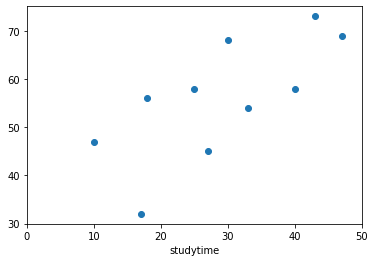

In [1]:
import numpy as np
import pandas as pd

studytime_df = pd.DataFrame({ "studytime" : [40,43,18,10,25,33,27,17,30,47],
                              "examscore" : [58,73,56,47,58,54,45,32,68,69]})
%matplotlib inline
studytime_df.plot(x = "studytime", y = "examscore", style= "o", legend = False, xlim = (0, 50));

As we discussed in class, we can use Pearson's r to determine degree of correlation. Here is how to do this in Python:

In [2]:
from scipy import stats

stats.pearsonr(studytime_df.studytime, studytime_df.examscore)

(0.7207104456511155, 0.018694683521204944)

That is, we got an r value of 0.72. Is this a significant correlation? Yes, at least at the 0.05 level, as we got a p-value of 0.019. How much of the variance in exam scores is explained by study time? This is the square of the r value.

In [3]:
corr_obj = stats.pearsonr(studytime_df.studytime, studytime_df.examscore)
corr_obj[0]**2

0.5194235464706295

Let's recompute r by hand. 

In [4]:
import math

# number of observations
num_observations = len(studytime_df)
# mean study time
mean_studytime = studytime_df.studytime.mean()
# standard deviation: use population standard deviation, not sample standard deviation
sd_studytime = math.sqrt(sum((studytime_df.studytime - mean_studytime)**2) / num_observations)

# z scores of study time
studytime_df["studytime_z"] = (studytime_df.studytime - mean_studytime)/sd_studytime

# same for the exam scores: first mean and standard deviation
mean_examscore = studytime_df.examscore.mean()
sd_examscore = math.sqrt(sum((studytime_df.examscore - mean_examscore)**2) / num_observations)

# z scores of exam scores
studytime_df["examscore_z"] = (studytime_df.examscore - mean_examscore) / sd_examscore

# and r
r = sum(studytime_df.studytime_z * studytime_df.examscore_z)/num_observations

r

0.7207104456511156

# Non-interval data

When you don't have interval data, use Spearman's rho, which is
Pearson's r on the ranks of the values
rather than on the values themselves. 

Let's say we have a subjective attention score by the teacher, as follows:

In [5]:
studytime_df["subjectivescore"] = [ 90, 95, 50, 50, 60, 65, 68, 45, 70, 90]

This is not interval data: We cannot be sure that the teacher's subjective difference between a 90 and a 95 is the same as their subjective difference between a 60 and a 65. We can still test to what extent this subjective attention score correlates with exam scores, but we use Spearman's rho:

In [6]:
stats.spearmanr(studytime_df.subjectivescore, studytime_df.examscore)

SpearmanrResult(correlation=0.7859363967596924, pvalue=0.007030735401842157)

We get a strong correlation, with a rho value of 0.786 and a p-value of 0.007. This is a significant correlation even at the stricter threshold of 0.01. 